In [1]:
from common import utils
import random
u=utils(False)


Ce cours a été régénéré le 2018-08-20 22:57:58.235488


# Les fichiers

## De l’information au stockage
Les informations utilisées dans un ordinateur sont stockées dans la *mémoire de masse*, qui se distingue
de la *mémoire vive* par sa résistance à l’extinction et de la *mémoire morte* (et plus tard, du *firmware*) par
sa mutabilité.

Les performances des systèmes de stockage de masse sont meilleures chaques années, mais l’ordre de
grandeur reste la ms ou 100 μs.
### De l’information au fichier
L’information est découpée en petites unités qui s’appellent des fichiers, sémantiquement cohérentes —
ce sont des informations qui « vont ensemble ». Ces éléments de base du stockage informatique peuvent
ne contenir que très peu d’information ou représenter plusieurs Go de données par fichier.
Un fichier est lié à la façon dont on y accède (son nom et son chemin), mais nous verrons que ce n’est pas
un identifiant : il peut y avoir plusieurs accès différents à un même fichier (liens).

### Nom et chemin
Le nom d'un fichier permet de le distinguer parmi un ensemble de fichiers rangés ensemble. Si on y ajoute le chemin d'accès, on a alors un moyen d'accéder au fichier et de le distinguer parmi tous les autres.

Dans les systèmes de fichiers modernes, on distingue toujours au moins deux types d'éléments :

  * les fichiers contiennent des données uniquement
  * les répertoires servent à l'organisation et contiennent soit des fichiers, soit d'autres répertoires.

La suite de répertoires à traverser pour accéder à un fichier est appelé le chemin d'accès. Au sein d'un même répertoire, il n'y a pas deux fichiers qui portent le même nom.

On a donc la possibilité d'accéder à un fichier une fois que l'on connait son chemin complet (ou nom complet): la racine d'où l'on part, les répertoires à traverser, et dans le répertoire final, le nom à utiliser.

Les répertoires à traverser sont séparés par le séparateur de chemin. Sous Linux et Unix, le séparateur est `/` alors que sous Windows c'est `\`.

Les noms de fichier ont souvent des règles de caractères interdits (notamment le séparateur de chemin est interdit). Souvent, pour aider le système ou l'utilisateur à deviner l'utilisation d'un fichier (le type de données), une extension est ajoutée séparée du corps du nom par un `.`. Sous Windows, l'extension est même obligatoire (et un nom sans extension désigne forcément un répertoire).

Exemples de chemin complet:

    C:\System\Program Files\Backup\backup.exe
    /usr/bin/stellarium
    /home/user/.local/share/Game Stand/README.pdf

### Choisir un nom

Un nom de fichier doit respecter deux sortes d'obligations

  * Obligations techniques selon le système d'exploitation (par exemple extension sous Windows, caractères interdits, taille)
  * Obligation d'information pour les humains ; comparer par exemple `texte.pdf`, `devoir-dubacq.pdf` (nom de l'enseignant), `devoir-martin.pdf` (nom de l'élève), `devoir-anglais-martin.pdf`…

Par ailleurs, certains systèmes différencient les noms selon la casse (distinction majuscules/minuscules sous Linux, confondu sous Windows et OSX).

### Organisation des données

Les données sont organisées en répertoires pour les ranger. C'est vrai de l'organisation de chaque utilisateur, mais aussi du système en général. Un système actuel compte facilement plus de 100 000 fichiers.

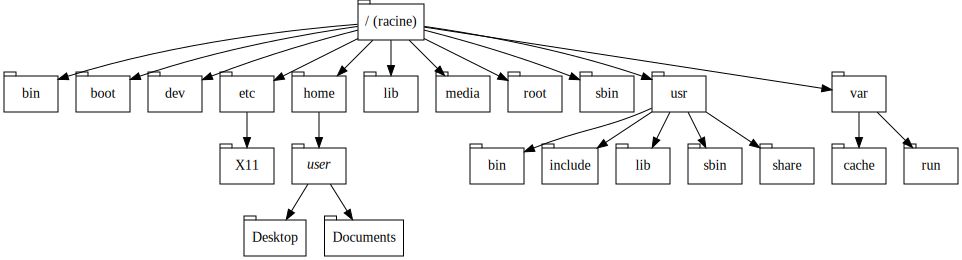

In [2]:
from graphviz import Digraph
import os.path

dot = Digraph(comment='FHS')

nodes=['/','/bin','/boot','/dev','/etc','/etc/X11','/home','/home/user','/home/user/Documents','/home/user/Desktop','/lib','/media','/usr','/usr/bin','/root','/sbin','/usr/include','/usr/lib','/usr/sbin','/usr/share','/var','/var/cache','/var/run']

labels={'':'/ (racine)','user':'<<i>user</i>>'}
nodes.sort()
for node in nodes:
    label=os.path.basename(node)
    if label in labels:
        label=labels[label]
    dot.node(node,label,shape='tab')
for nodex in nodes:
    if nodex != '/':
        root='/'
        for node in nodes:
            if nodex.startswith(node) and nodex != node:
                root=node
        dot.edge(root,nodex)
display(dot)

### La notion de chemin

Le chemin est une suite des répertoires à traverser pour atteindre un fichier, à partir d'un point de départ donné.

Il existe deux sortes de chemins :

  * Les chemins absolus, qui partent de la racine
  * Les chemins relatifs, qui partent d'un autre répertoire (qu'on appelle en général le *répertoire courant*).

On cherche en général le chemin *canonique* c'est-à-dire celui qui est le plus court. En effet, chaque lien de parent vers enfant (par exemple `Documents` est dans `user`) peut-être parcouru dans le sens inverse et donc on pourrait faire un chemin qui va dans des endroits totalement inutiles et en revient avant d'aller vers la bonne cible.

Il se trouve que sous Windows comme sous Unix, la désignation du parent est la même et est `..`. *Attention : deux points, pas trois ni un.*

Dans l'exemple ci-dessus, le chemin de `X11` à `Documents` est `../../home/user/Documents`. Le chemin absolu vers `Desktop` est `/home/user/Desktop`, et le chemin absolu vers `bin` est... variable selon le `bin` considéré ! En effet, deux répertoires ou fichiers peuvent porter le même nom s'ils ne sont pas dans le même répertoire !

#### Activité : Chemins relatifs et absolus

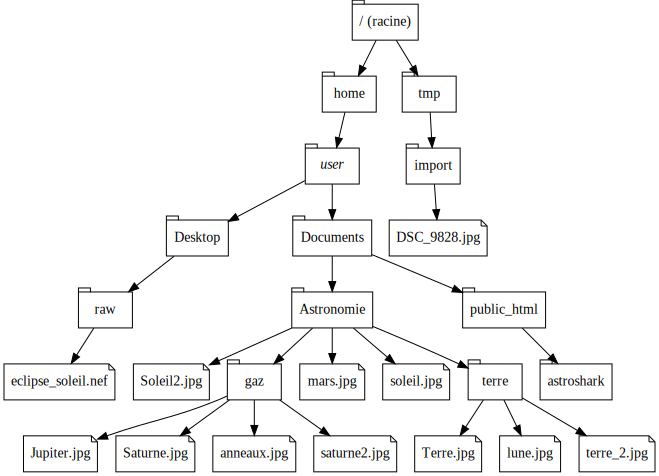

Dans le graphique ci-dessous, donnez le chemin relatif ou absolu pour atteindre les fichiers spécifiés:

`saturne2.jpg`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin absolu est `/home/user/Documents/Astronomie/gaz/saturne2.jpg`

`Terre.jpg`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin absolu est `/home/user/Documents/Astronomie/terre/Terre.jpg`

Atteindre `soleil.jpg` depuis `/home/user/Documents/public_html/astroshark/`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin relatif est `../../Astronomie/soleil.jpg`

Atteindre `Jupiter.jpg` depuis `/home/user/Documents/Astronomie/`

Chemin  > `_____________________________________________________`

**Solution :** Le chemin relatif est `gaz/Jupiter.jpg`

In [3]:
import os.path
import re
shapes={}
files=[
        "/home/user/Documents/Astronomie/soleil.jpg",
        "/home/user/Documents/Astronomie/Soleil2.jpg",
        "/home/user/Documents/Astronomie/terre/lune.jpg",
        "/home/user/Documents/Astronomie/terre/Terre.jpg",
        "/home/user/Documents/Astronomie/terre/terre_2.jpg",
        "/home/user/Documents/Astronomie/mars.jpg",
        "/home/user/Documents/Astronomie/gaz/Jupiter.jpg",
        "/home/user/Documents/Astronomie/gaz/Saturne.jpg",
        "/home/user/Documents/Astronomie/gaz/saturne2.jpg",
        "/home/user/Documents/Astronomie/gaz/anneaux.jpg",
        "/home/user/Desktop/raw/eclipse_soleil.nef",
        "/home/user/Documents/public_html/astroshark/",
        "/tmp/import/DSC_9828.jpg"
      ]
froms = [
    "/home/user/Documents/public_html/astroshark/",
    "/tmp/",
    "/home/user/Desktop/",
    "/home/user/Documents/Astronomie/",
    "/home/user/Documents/"
]
t=set()
t=t.union({'/'})
for n in files:
    p=''    
    for f in n.split("/"):
        if len(f)>0:
            p=p+'/'+f
            t=t.union({p})
nodes=sorted(list(t))
dot = Digraph(comment='Tree')
for node in nodes:
    label=os.path.basename(node)
    if label in labels:
        label=labels[label]
    shape='tab'
    if node in files:
        shape='note'
    if node in shapes:
        shape=shapes[node]
    dot.node(node,label,shape=shape)
for nodex in nodes:
    if nodex != '/':
        root='/'
        for node in nodes:
            if nodex.startswith(node) and nodex != node:
                root=node
        dot.edge(root,nodex)
u.activite('Chemins relatifs et absolus')
display(dot)
u.mark('Dans le graphique ci-dessous, donnez le chemin relatif ou absolu pour atteindre les fichiers spécifiés:')
for i in [1,2]:
    p=random.choice(files)
    files.remove(p)
    u.mark('`'+os.path.basename(p)+'`')
    u.solutioncheck('Chemin ','Le chemin absolu est `'+p+'`','Bravo!','Non, regardez bien à partir de la racine.')
for i in [1,2]:
    fromd=random.choice(froms)
    froms.remove(fromd)
    p=random.choice(files)
    files.remove(p)
    u.mark('Atteindre `'+os.path.basename(p)+'` depuis `'+fromd+'`')
    u.solutioncheck('Chemin ','Le chemin relatif est `'+os.path.relpath(p,fromd)+'`','Bravo!','Non, regardez bien à partir de `'+fromd+'`.')


In [4]:
u.xtoggle()

Mode interactif
